# Pre Processing

In [149]:
#importing common libraries
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
%matplotlib inline
from sklearn.decomposition import TruncatedSVD


import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.cluster import KMeans 
np.set_printoptions(suppress=True)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [150]:
#importing dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
#importing train and test dataset

train = fetch_20newsgroups(subset="train") 

test= fetch_20newsgroups(subset="test")

X_train = train["data"]

X_test = test['data']

y_train = train["target"] 

y_test = test['target']

In [151]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = train.target_names

In [ ]:
print(X_train[0])
print(y_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7


In [ ]:
print(type(X_test[2]))

<class 'str'>


In [ ]:
print(len(X_train))
print(type(X_train[0]))

11314
<class 'str'>


In [ ]:
print(Counter(y_train))

Counter({10: 600, 15: 599, 8: 598, 9: 597, 11: 595, 7: 594, 13: 594, 14: 593, 5: 593, 2: 591, 12: 591, 3: 590, 6: 585, 1: 584, 4: 578, 17: 564, 16: 546, 0: 480, 18: 465, 19: 377})


In [ ]:
df=pd.DataFrame(X_train,columns=['mess'])

In [ ]:
df['target']=y_train

In [ ]:
df['length']=df['mess'].apply(len)
df.head()

mess  target  length
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7     721
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4     858
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4    1981
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1     815
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14    1120

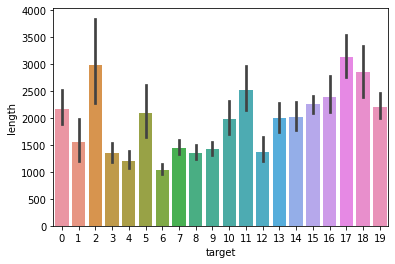

In [ ]:
sns.barplot(x='target',y='length',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

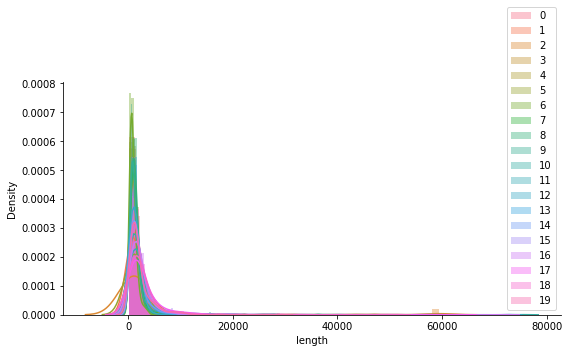

In [ ]:
g=sns.FacetGrid(df,hue='target',height=4,aspect=2)
g=g.map(sns.distplot,'length')
plt.legend()
#length is not a good feature they seems to be same

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

# Models

## TF_IDF Scratch

In [ ]:
def tf_idf(documents , considered_position):

  
  considered_document = documents[considered_position]
  unique_words_in_considered_document = list(set(considered_document))

  tf_idf_values = []

  n = len(unique_words_in_considered_document)

  dict_tf_idf_values = {}

  for i in range(n):
    tf = considered_document.count(unique_words_in_considered_document[i])/len(considered_document)
    count_word = 0

    for x in documents:
        if(unique_words_in_considered_document[i] in x):
          count_word += 1
    
    idf = np.log(len(documents)/count_word)

    tf_idf = tf*idf

    dict_tf_idf_values[unique_words_in_considered_document[i]] = tf_idf

  return dict_tf_idf_values


In [ ]:
Doc1 = "Hello World".split(" ")
Doc2 = "World is Good".split(" ")
Doc3 = "Hello my name is John".split(" ")
Doc4 = "You are not good".split(" ")
Doc5 = "Hey there what is your name".split(" ")

In [ ]:
for i in range(5):
  print("For Doc"+str(i+1))
  print(tf_idf([Doc1, Doc2, Doc3 , Doc4 , Doc5] , i))

For Doc1
{'Hello': 0.45814536593707755, 'World': 0.45814536593707755}
For Doc2
{'is': 0.1702752079219969, 'World': 0.3054302439580517, 'Good': 0.5364793041447}
For Doc3
{'John': 0.3218875824868201, 'Hello': 0.18325814637483104, 'my': 0.3218875824868201, 'is': 0.10216512475319815, 'name': 0.18325814637483104}
For Doc4
{'not': 0.40235947810852507, 'good': 0.40235947810852507, 'You': 0.40235947810852507, 'are': 0.40235947810852507}
For Doc5
{'Hey': 0.26823965207235, 'is': 0.08513760396099845, 'name': 0.15271512197902584, 'what': 0.26823965207235, 'your': 0.26823965207235, 'there': 0.26823965207235}


## Apply PCA on X_train

In [ ]:
pca = TruncatedSVD(6)
Principal_components=pca.fit_transform(x_train_tfidf)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0      0.122830 -0.035730 -0.047760 -0.016882 -0.023729  0.030194
1      0.094323 -0.057829 -0.035085  0.015127 -0.000322  0.036968
2      0.178615 -0.032686 -0.006257  0.034359 -0.016839 -0.015278
3      0.137443 -0.047881  0.032646  0.002653  0.010802 -0.011419
4      0.144166 -0.019671 -0.010680  0.000971  0.013046 -0.004759
...         ...       ...       ...       ...       ...       ...
11309  0.082102  0.012622  0.009043 -0.019032  0.011100 -0.036552
11310  0.096937 -0.070237 -0.022796  0.054918  0.003394  0.013224
11311  0.063265 -0.035411  0.036428  0.025309 -0.000116 -0.017117
11312  0.101787 -0.023811 -0.009685 -0.007762 -0.002443  0.001718
11313  0.098700 -0.035842 -0.017621 -0.023923  0.022587  0.057430

[11314 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


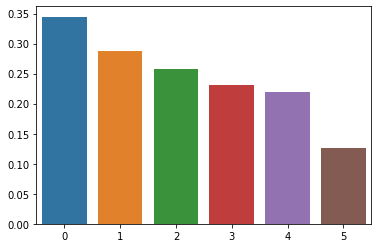

In [ ]:
sns.barplot(list(range(6)) , sorted(pca.explained_variance_ratio_*100 , reverse=True))

## ROC_AUC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(y_test,y_pred):
    unique_labels = np.unique(y_test)
    for i in unique_labels:
        y_test_rc = []
        y_pred_rc = []
        for j in unique_labels:
            for k in y_test:
                if k==i:
                    y_test_rc.append(0)
                else:
                    y_test_rc.append(1)
            for k in y_pred:
                if k==i:
                    y_pred_rc.append(0)
                else:
                    y_pred_rc.append(1)
        # Compute fpr, tpr, thresholds and roc auc
        fpr, tpr, thresholds = roc_curve(y_test_rc, y_pred_rc)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate or (1 - Specifity)')
        plt.ylabel('True Positive Rate or (Sensitivity)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

## SVM

In [145]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC()
model_svc.fit(x_train_tfidf,y_train)

print ("LinearSVC 10-Cross Validation Score:",cross_val_score(model_svc, x_train_tfidf, y_train, cv=5, scoring='accuracy').mean())

LinearSVC 10-Cross Validation Score: 0.9240767070151318


In [ ]:
C = [0.01,0.1,1,10,100]

param_grid_svc = {'C' :  C}

gd=GridSearchCV(estimator=model_svc,param_grid=param_grid_svc)
gd.fit(x_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
print(gd.best_score_)
print(gd.best_estimator_)

0.9240767070151318
LinearSVC(C=1)


In [146]:
model_svc = LinearSVC(C=1)
model_svc.fit(x_train_tfidf,y_train)

print ("LinearSVC 10-Cross Validation Score:",cross_val_score(model_svc, x_train_tfidf, y_train, cv=5, scoring='accuracy').mean())

LinearSVC 10-Cross Validation Score: 0.9240767070151318


In [ ]:
y_pred_svc = model_svc.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       319
           1       0.74      0.81      0.78       389
           2       0.77      0.74      0.75       394
           3       0.71      0.75      0.73       392
           4       0.82      0.85      0.84       385
           5       0.87      0.76      0.81       395
           6       0.83      0.89      0.86       390
           7       0.92      0.90      0.91       396
           8       0.96      0.96      0.96       398
           9       0.91      0.94      0.92       397
          10       0.96      0.98      0.97       399
          11       0.93      0.94      0.94       396
          12       0.79      0.77      0.78       393
          13       0.90      0.86      0.88       396
          14       0.90      0.93      0.91       394
          15       0.85      0.94      0.89       398
          16       0.75      0.91      0.82       364
          17       0.98    

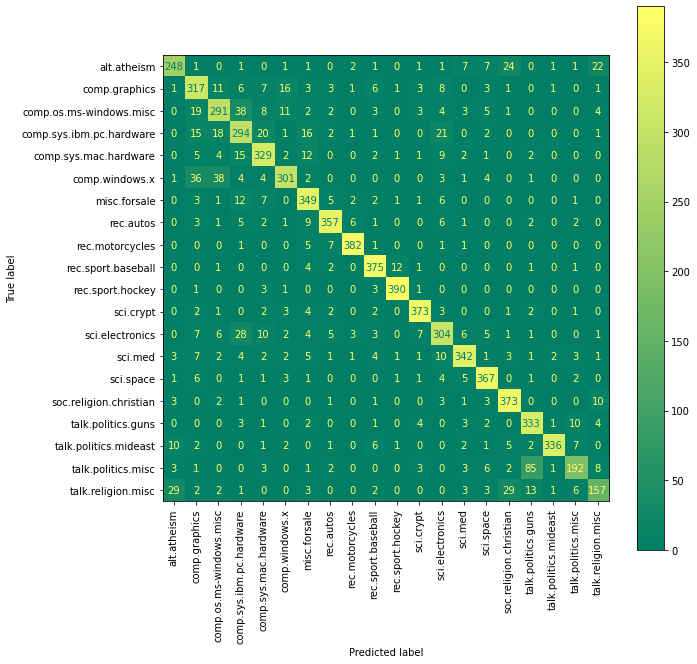

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

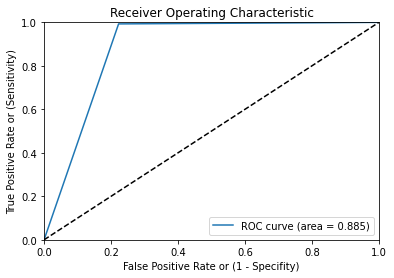

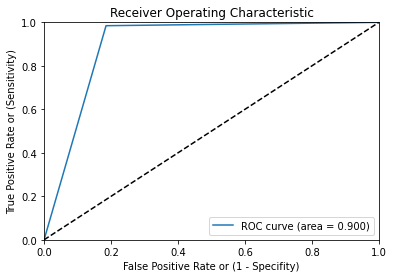

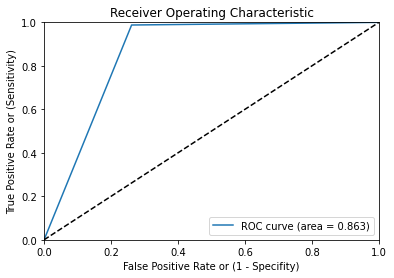

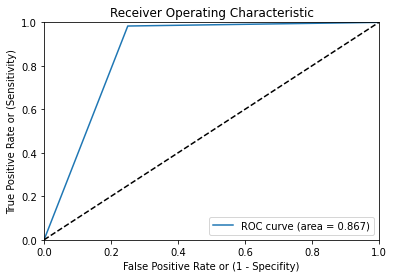

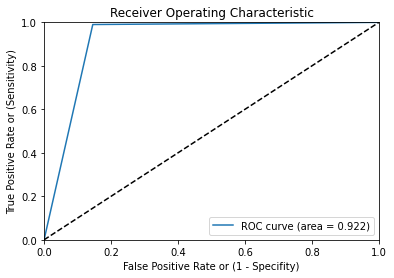

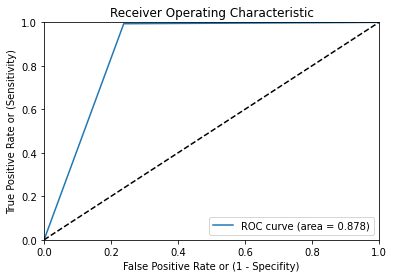

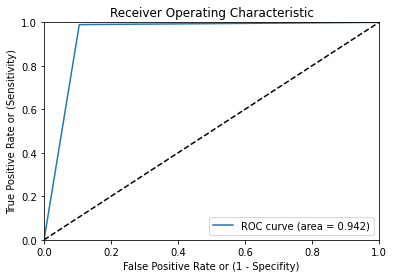

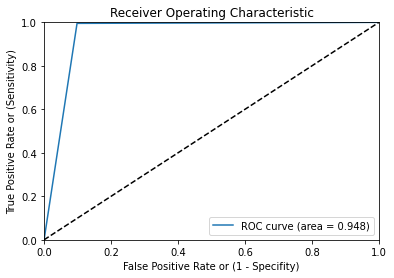

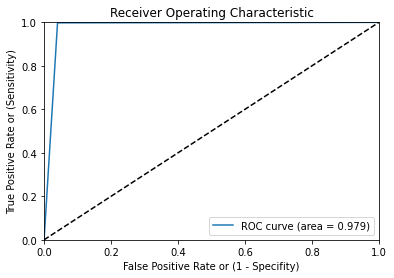

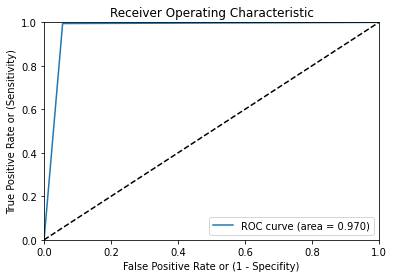

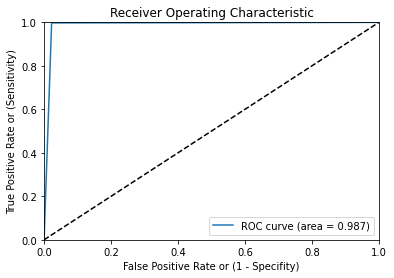

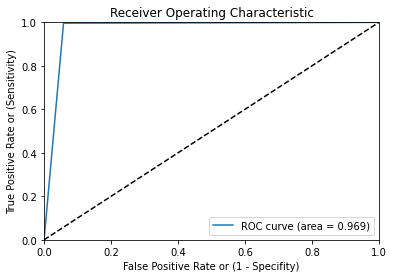

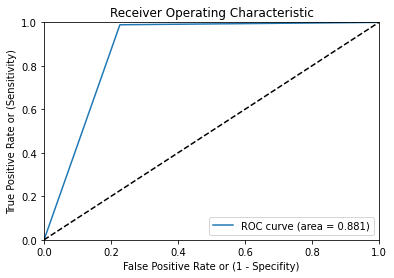

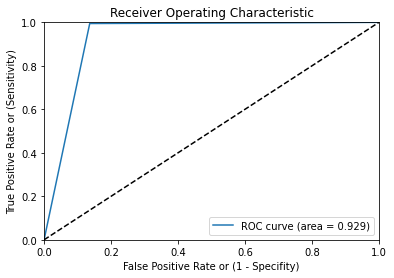

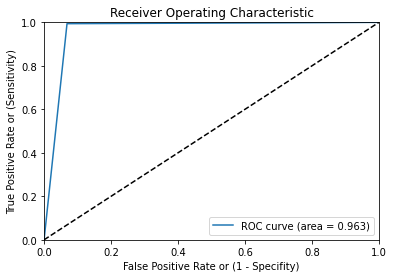

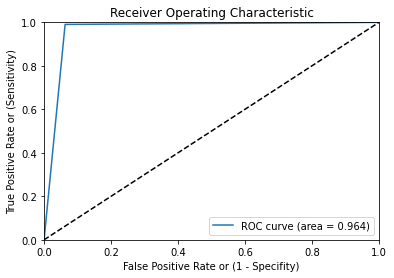

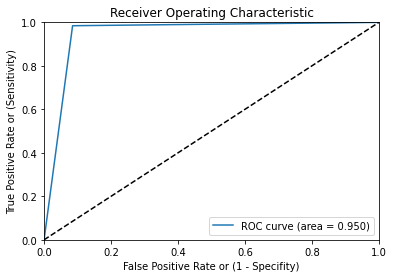

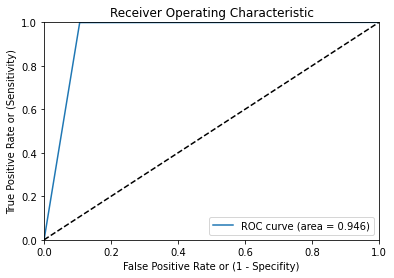

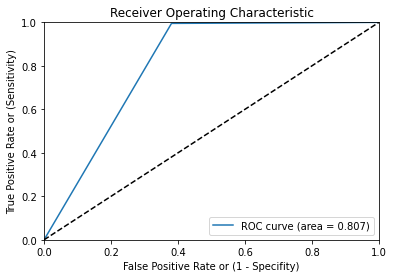

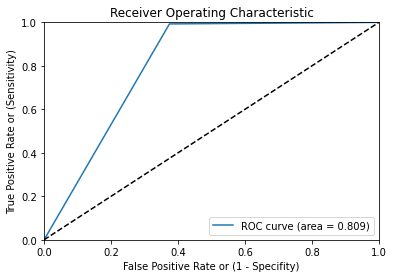

In [ ]:
plot_roc_auc(y_test,y_pred_svc)

## Naive Bayes

In [139]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
model_mnb.fit(x_train_tfidf,y_train)

print ("MultinomialNB 10-Cross Validation Score:",cross_val_score(model_mnb, x_train_tfidf, y_train, cv=5, scoring='accuracy').mean())

MultinomialNB 10-Cross Validation Score: 0.8803252882549513


In [ ]:
alpha = [1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

param_grid_mnb = {'alpha' : alpha}

gd=GridSearchCV(estimator=model_mnb,param_grid=param_grid_mnb,verbose=True)
gd.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
             verbose=True)

In [ ]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8803252882549513
MultinomialNB(alpha=1)


In [ ]:
model_mnb = MultinomialNB(alpha=1)
model_mnb.fit(x_train_tfidf,y_train)

print ("MultinomialNB 10-Cross Validation Score:",cross_val_score(model_mnb, x_train_tfidf, y_train, cv=5, scoring='accuracy').mean())

MultinomialNB 10-Cross Validation Score: 0.8803252882549513


In [ ]:
y_pred_mnb = model_mnb.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       319
           1       0.78      0.72      0.75       389
           2       0.79      0.72      0.75       394
           3       0.68      0.81      0.74       392
           4       0.86      0.81      0.84       385
           5       0.87      0.78      0.82       395
           6       0.87      0.80      0.83       390
           7       0.88      0.91      0.90       396
           8       0.93      0.96      0.95       398
           9       0.91      0.92      0.92       397
          10       0.88      0.98      0.93       399
          11       0.75      0.96      0.84       396
          12       0.84      0.65      0.74       393
          13       0.92      0.79      0.85       396
          14       0.82      0.94      0.88       394
          15       0.62      0.96      0.76       398
          16       0.66      0.95      0.78       364
          17       0.95    

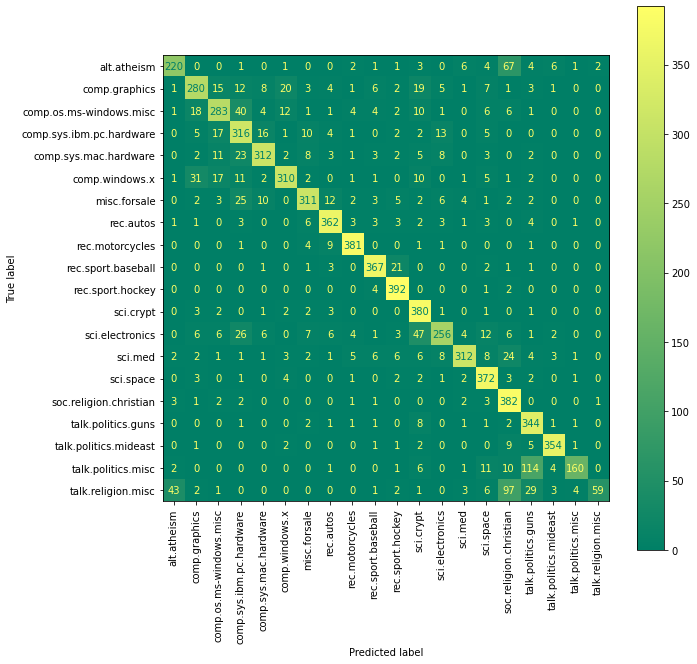

In [ ]:
cm = confusion_matrix(y_test, y_pred_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

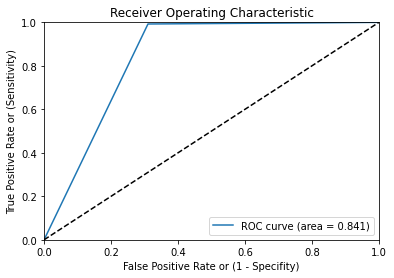

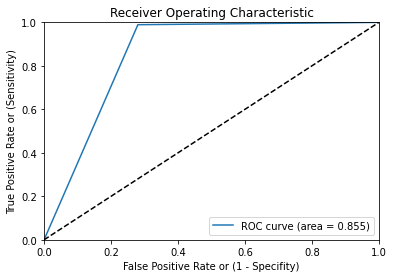

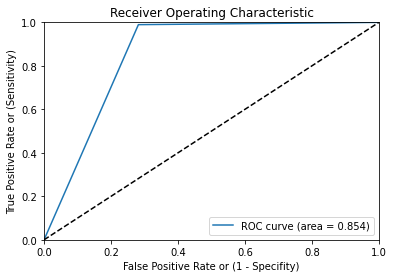

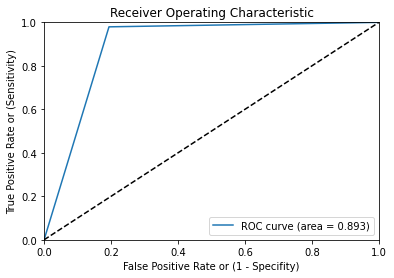

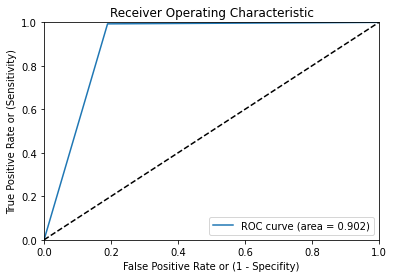

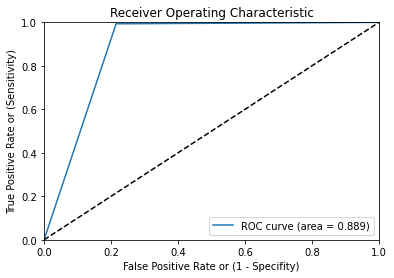

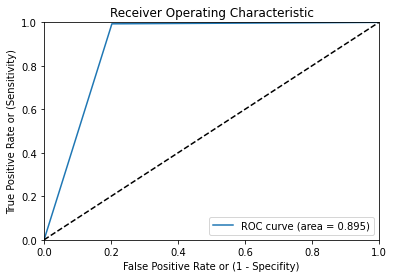

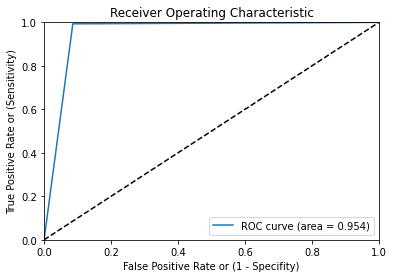

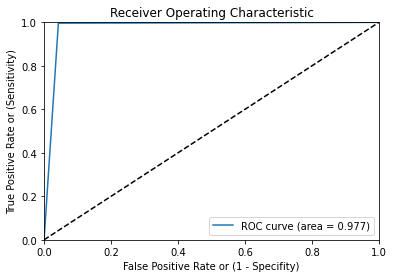

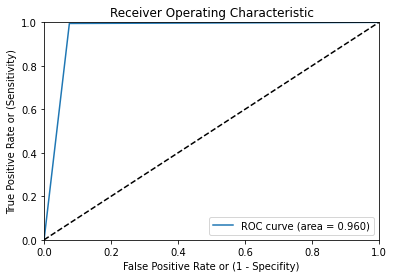

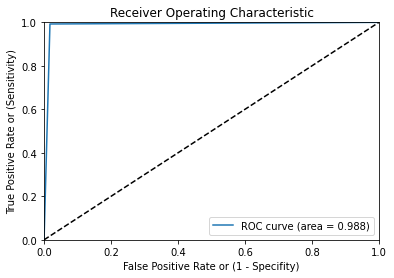

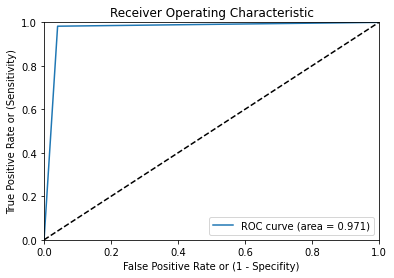

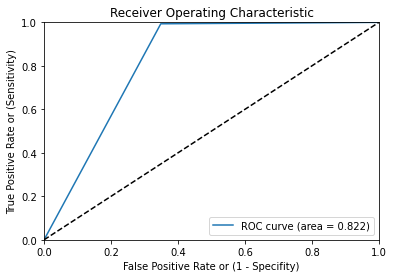

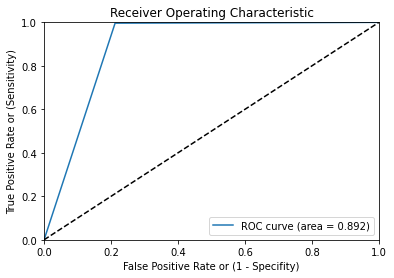

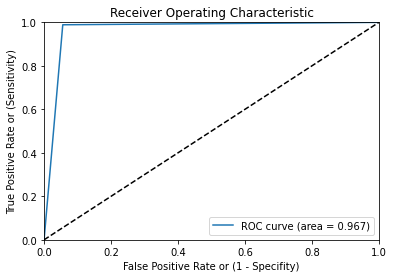

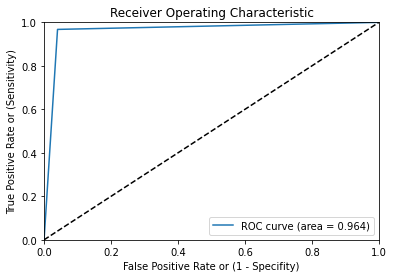

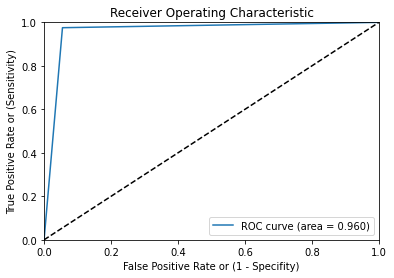

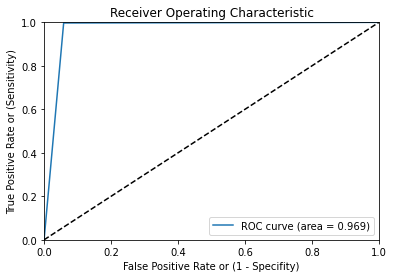

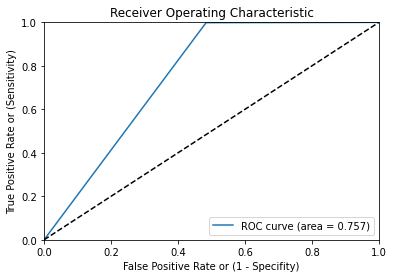

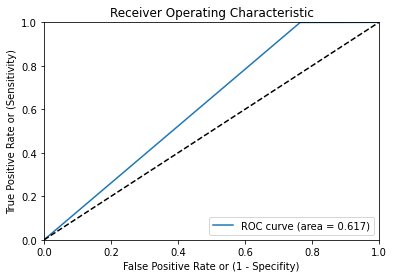

In [ ]:
plot_roc_auc(y_test,y_pred_mnb)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lgc = LogisticRegression()
model_lgc.fit(x_train_tfidf,y_train)

LogisticRegression()

In [ ]:
y_pred_lgc = model_lgc.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_lgc))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       319
           1       0.71      0.80      0.75       389
           2       0.75      0.76      0.75       394
           3       0.71      0.74      0.72       392
           4       0.80      0.83      0.82       385
           5       0.85      0.75      0.79       395
           6       0.78      0.87      0.82       390
           7       0.90      0.89      0.90       396
           8       0.94      0.95      0.94       398
           9       0.88      0.92      0.90       397
          10       0.94      0.96      0.95       399
          11       0.95      0.91      0.93       396
          12       0.75      0.78      0.76       393
          13       0.88      0.86      0.87       396
          14       0.89      0.91      0.90       394
          15       0.81      0.93      0.86       398
          16       0.75      0.90      0.82       364
          17       0.97    

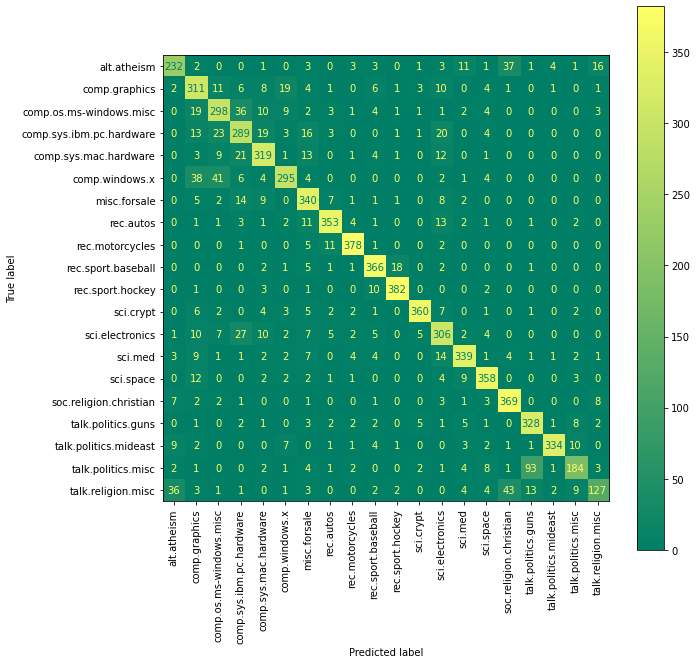

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

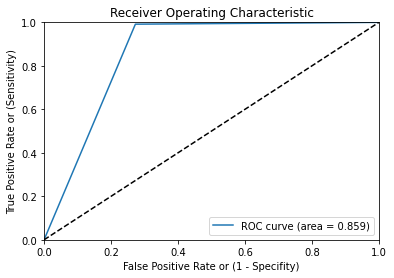

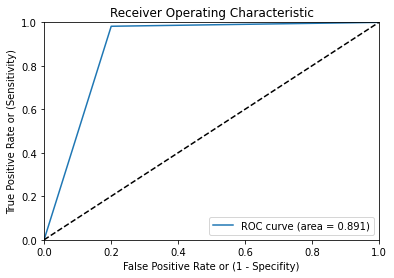

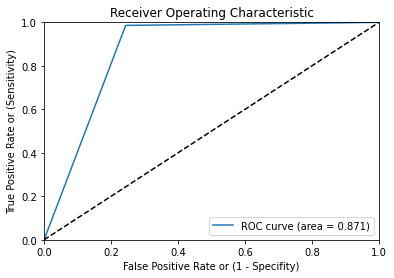

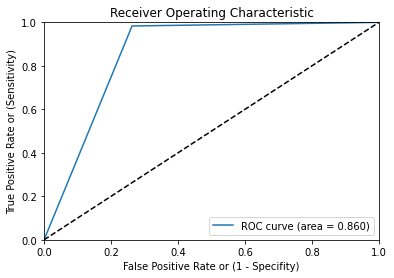

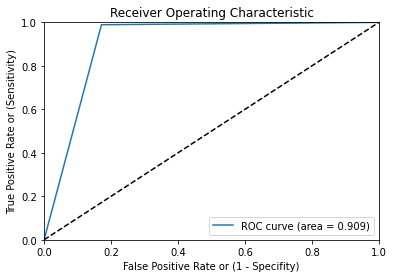

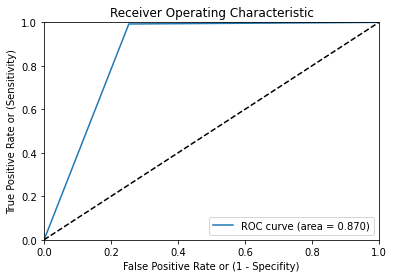

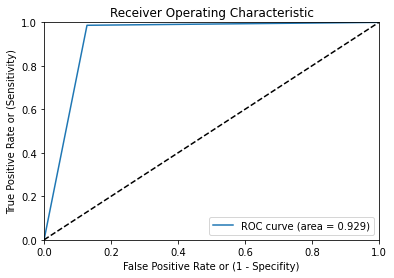

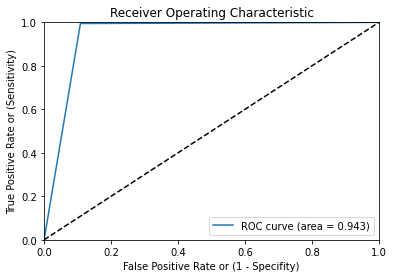

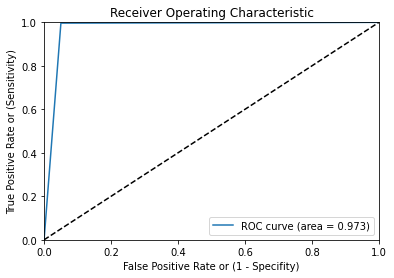

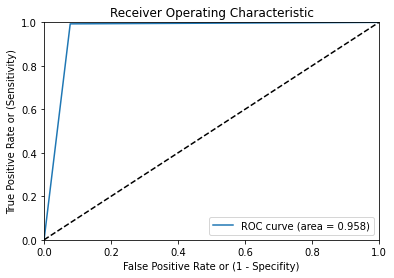

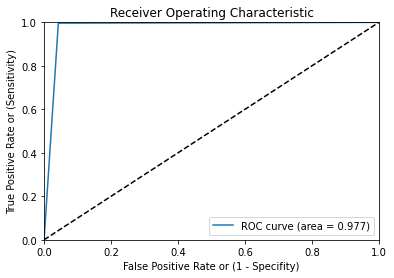

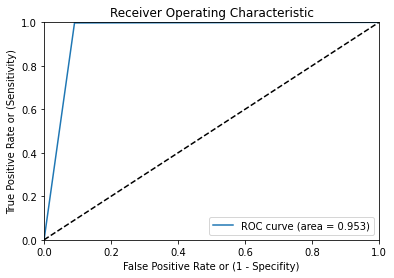

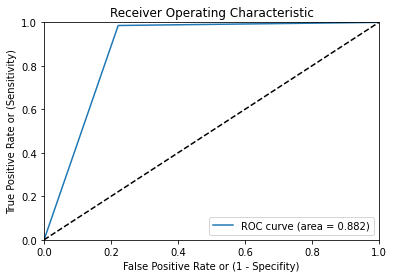

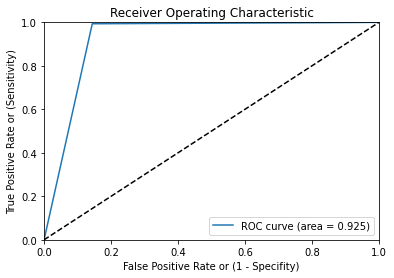

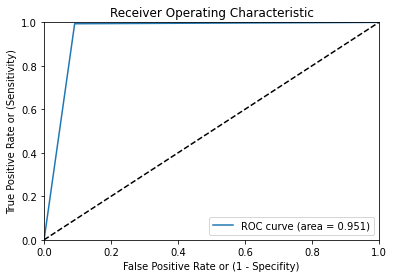

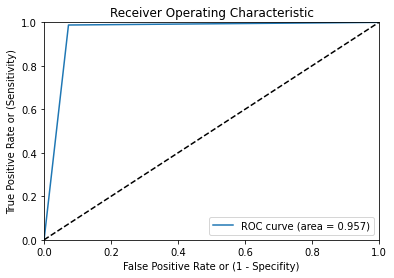

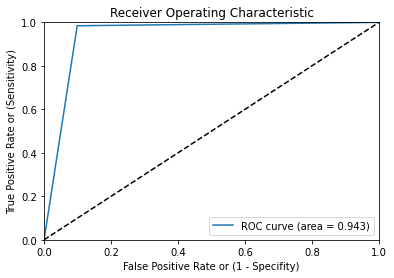

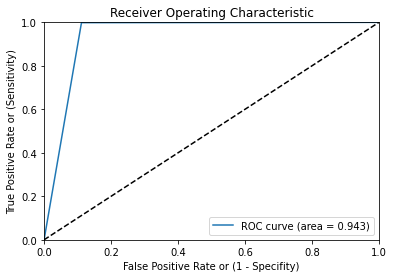

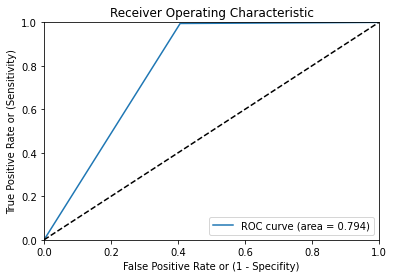

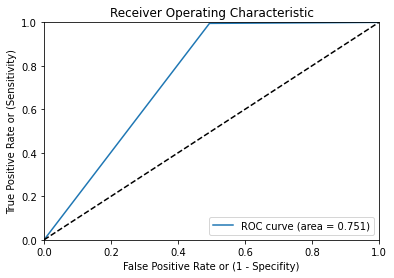

In [ ]:
plot_roc_auc(y_test,y_pred_lgc)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dec_tree = DecisionTreeClassifier()

In [ ]:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(x_train_tfidf,y_train)

print ("Decision tree classifier 10-Cross Validation Score:",cross_val_score(model_dec_tree, x_train_tfidf, y_train, cv=5, scoring='accuracy').mean())

Decision tree classifier 10-Cross Validation Score: 0.6488430145034897


In [ ]:
y_pred_dec_tree = model_dec_tree.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       319
           1       0.42      0.47      0.44       389
           2       0.49      0.54      0.51       394
           3       0.40      0.40      0.40       392
           4       0.53      0.57      0.55       385
           5       0.53      0.48      0.50       395
           6       0.65      0.72      0.68       390
           7       0.63      0.58      0.60       396
           8       0.75      0.78      0.77       398
           9       0.52      0.58      0.55       397
          10       0.75      0.71      0.73       399
          11       0.79      0.70      0.74       396
          12       0.34      0.36      0.35       393
          13       0.57      0.48      0.52       396
          14       0.64      0.62      0.63       394
          15       0.74      0.73      0.74       398
          16       0.55      0.68      0.61       364
          17       0.77    

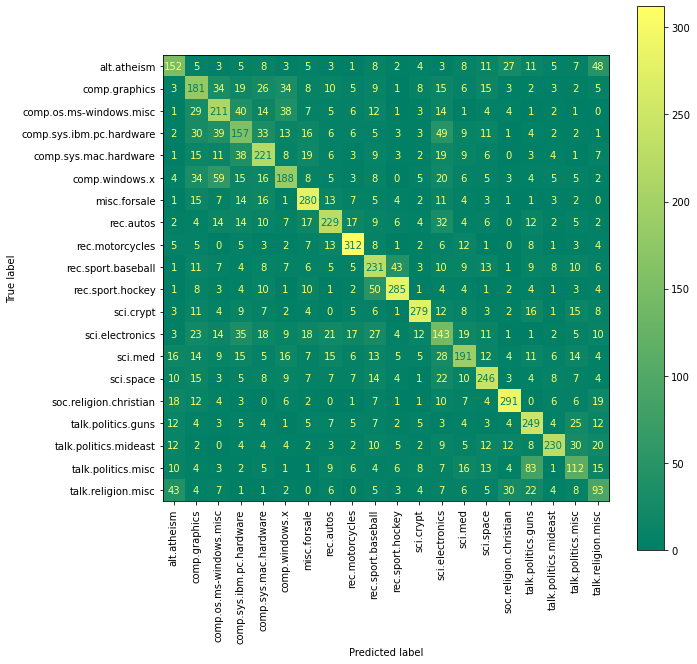

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_dec_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

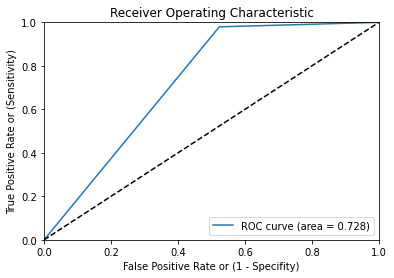

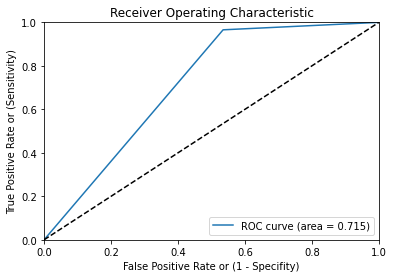

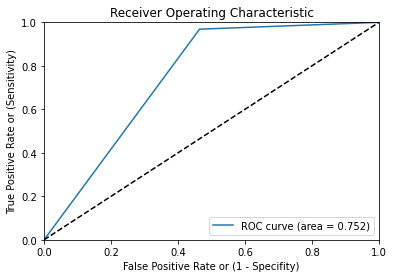

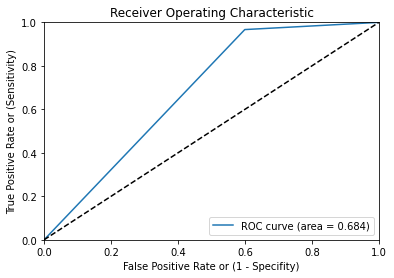

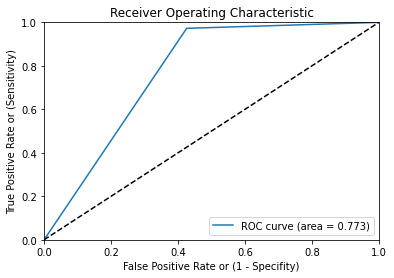

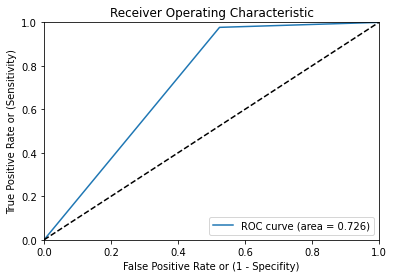

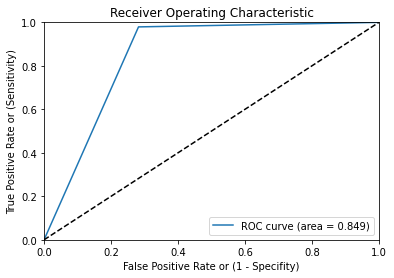

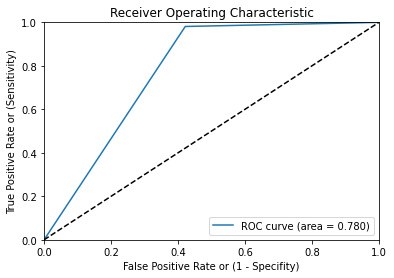

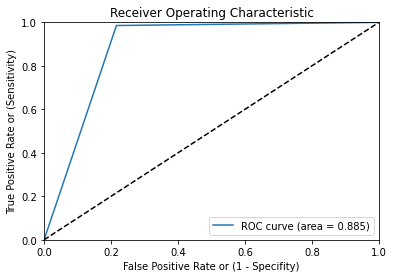

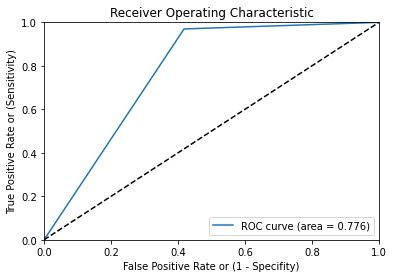

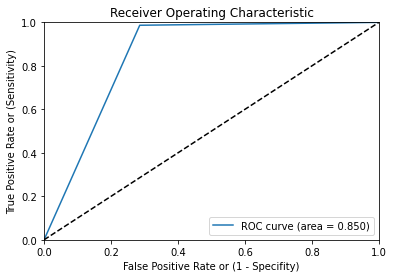

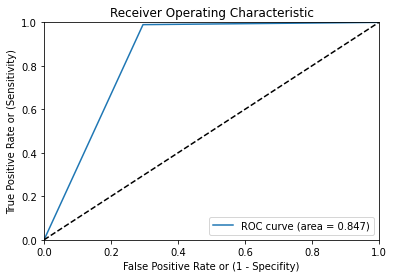

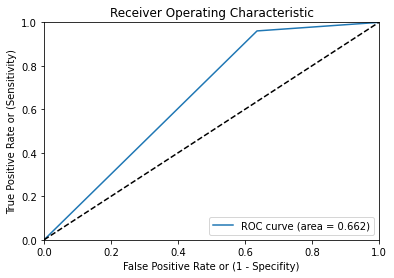

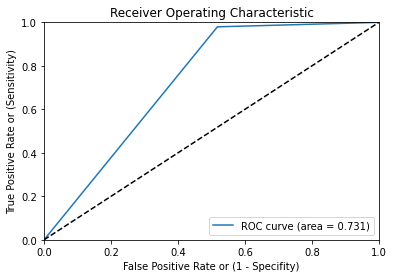

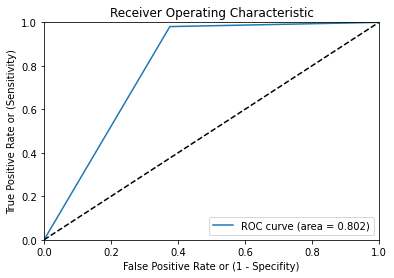

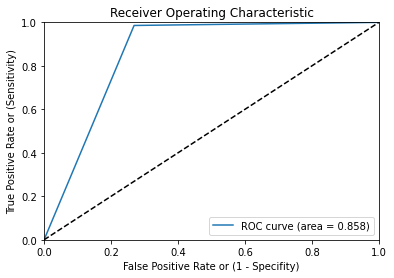

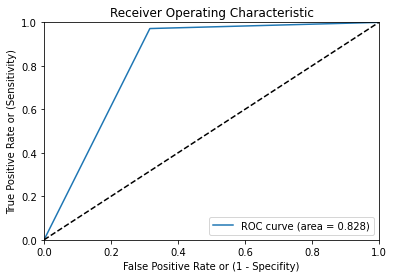

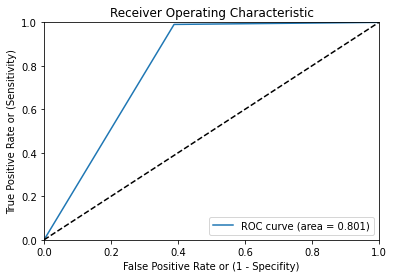

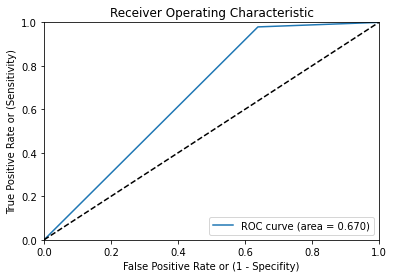

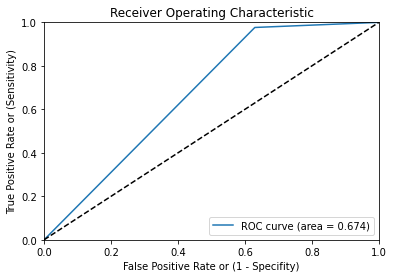

In [ ]:
plot_roc_auc(y_test,y_pred_dec_tree)

## Nerual Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='adam', alpha=0.1,hidden_layer_sizes=(12, 12 , 3), random_state=1 , max_iter=100)
nn.fit(x_train_tfidf, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(12, 12, 3), max_iter=100,
              random_state=1)

In [ ]:
y_pred_nn = nn.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.35      0.51      0.41       319
           1       0.62      0.40      0.49       389
           2       0.54      0.43      0.48       394
           3       0.34      0.55      0.42       392
           4       0.33      0.44      0.38       385
           5       0.39      0.39      0.39       395
           6       0.72      0.41      0.53       390
           7       0.60      0.50      0.54       396
           8       0.93      0.70      0.79       398
           9       0.31      0.54      0.39       397
          10       0.85      0.65      0.74       399
          11       0.79      0.57      0.66       396
          12       0.60      0.32      0.42       393
          13       0.28      0.50      0.36       396
          14       0.83      0.61      0.71       394
          15       0.84      0.50      0.62       398
          16       0.52      0.44      0.48       364
          17       0.95    

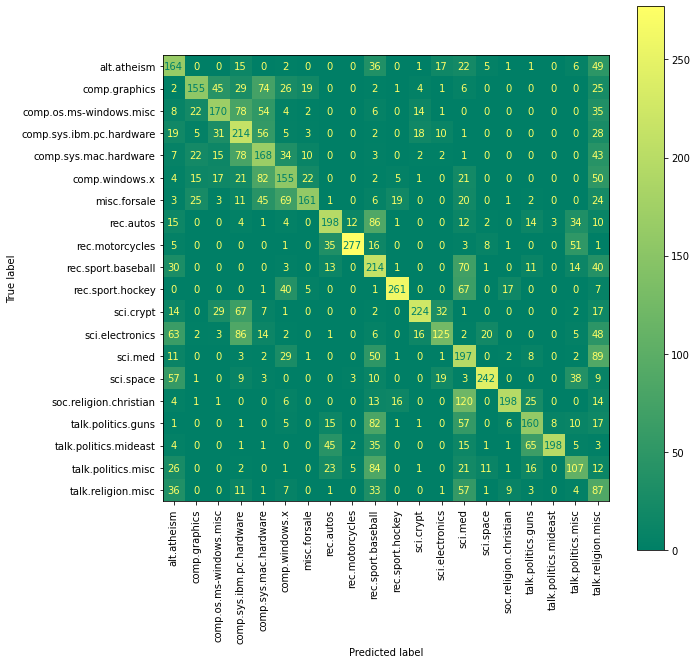

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

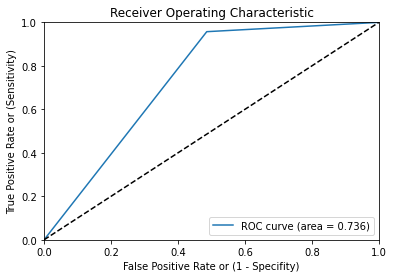

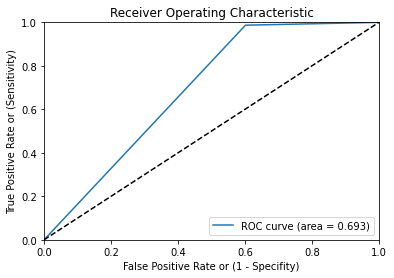

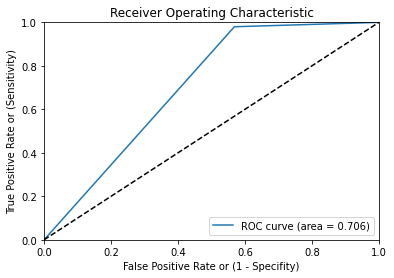

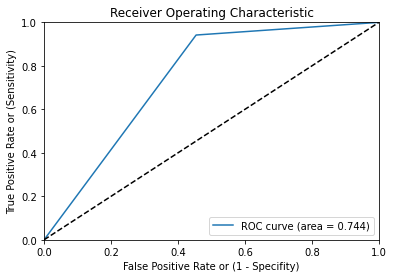

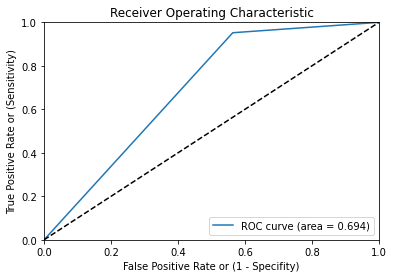

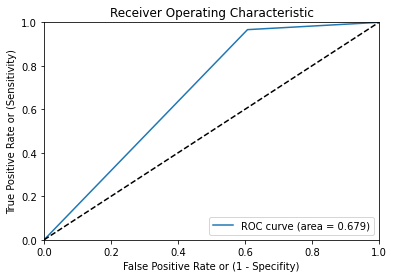

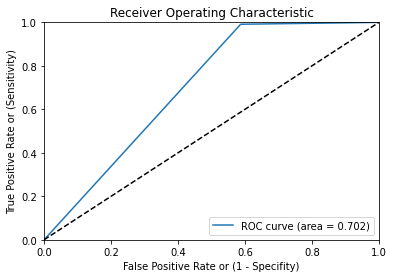

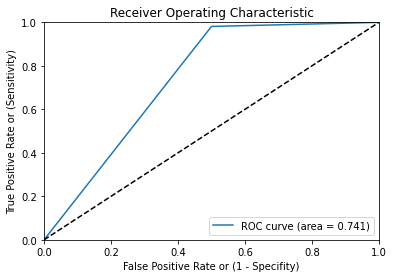

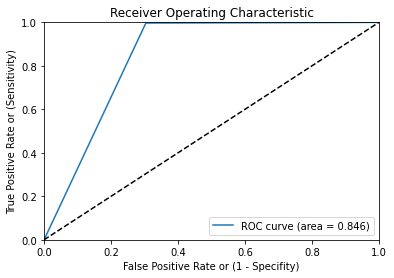

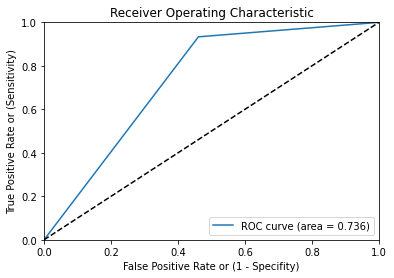

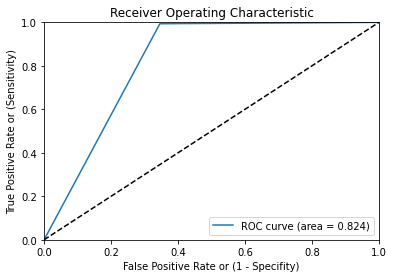

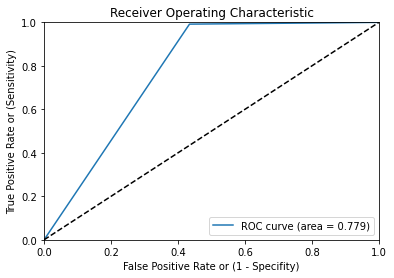

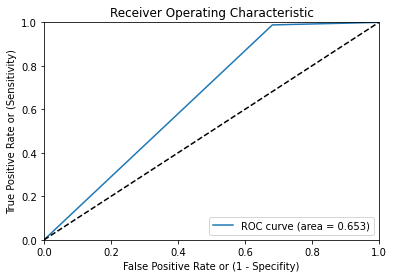

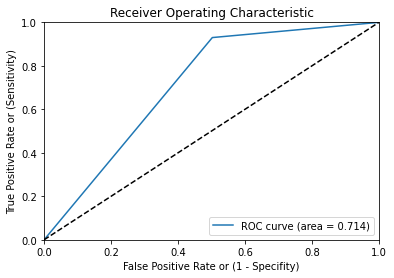

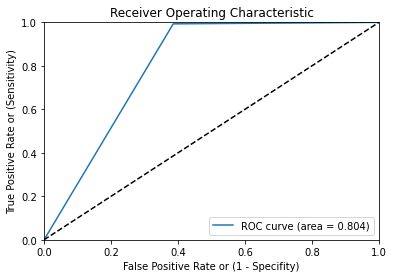

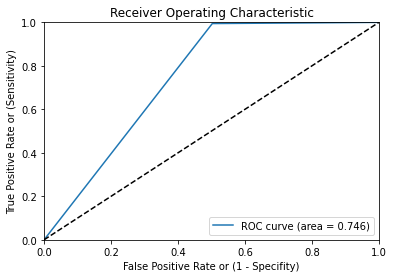

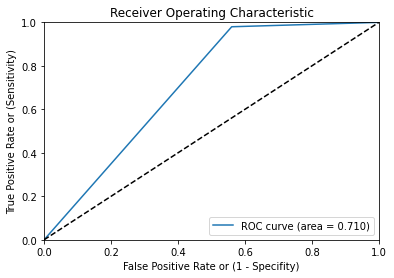

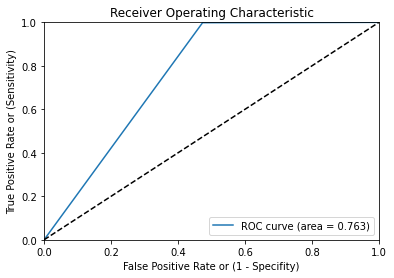

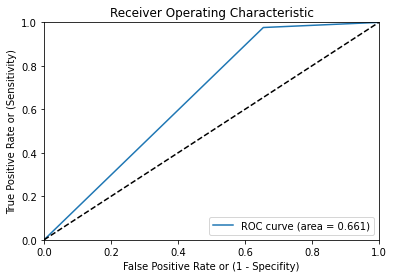

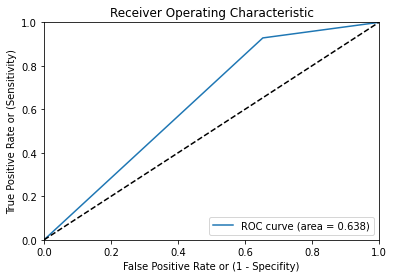

In [ ]:
plot_roc_auc(y_test,y_pred_nn)

## Lightgbm

In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()

model_lgb.fit(x_train_tfidf,y_train)

LGBMClassifier()

In [ ]:
y_pred_lgb = model_lgb.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       319
           1       0.64      0.72      0.68       389
           2       0.72      0.76      0.74       394
           3       0.63      0.72      0.67       392
           4       0.76      0.80      0.78       385
           5       0.82      0.70      0.75       395
           6       0.82      0.87      0.85       390
           7       0.82      0.79      0.81       396
           8       0.90      0.87      0.88       398
           9       0.86      0.89      0.88       397
          10       0.94      0.88      0.91       399
          11       0.92      0.86      0.89       396
          12       0.58      0.66      0.62       393
          13       0.85      0.79      0.82       396
          14       0.87      0.89      0.88       394
          15       0.86      0.92      0.89       398
          16       0.67      0.84      0.75       364
          17       0.97    

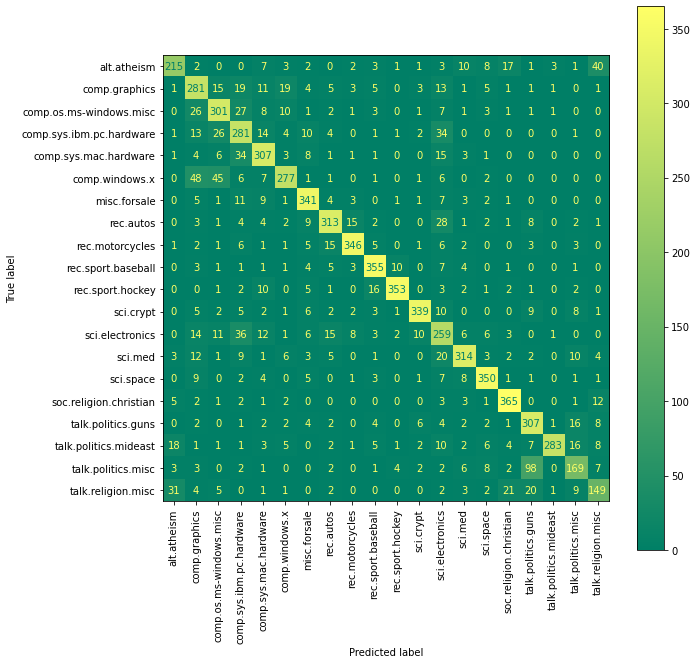

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

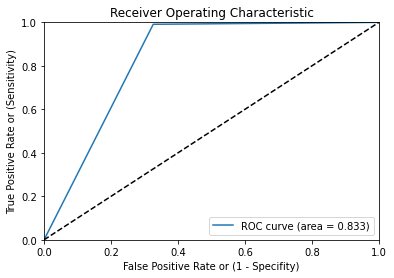

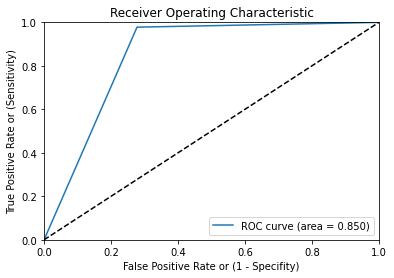

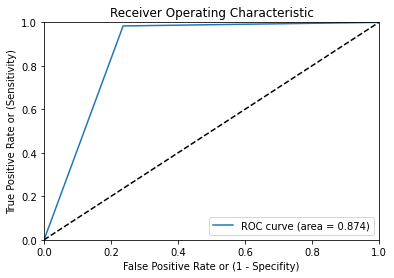

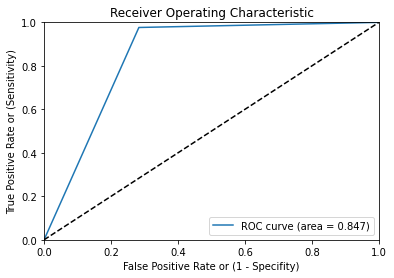

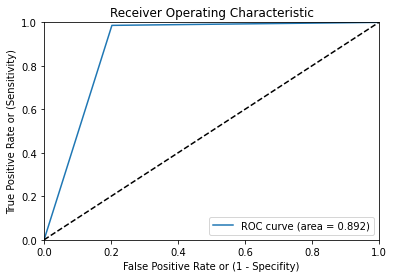

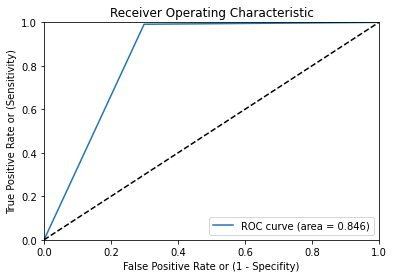

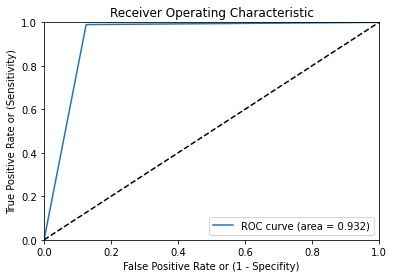

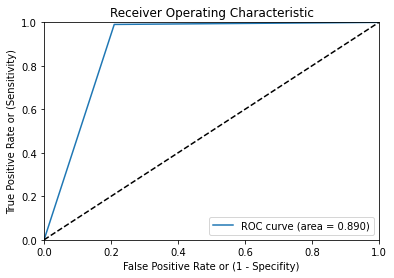

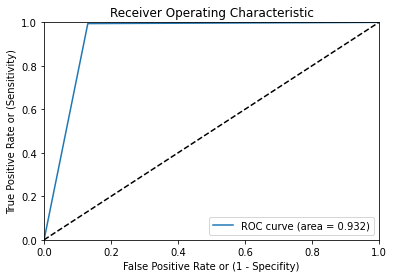

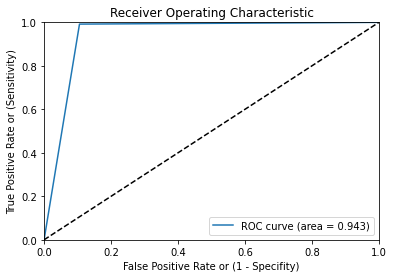

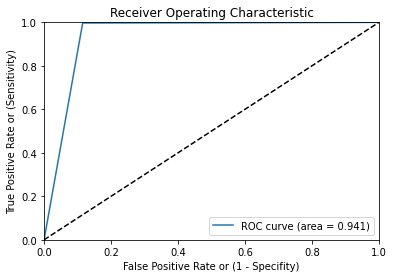

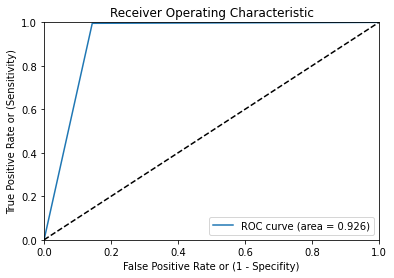

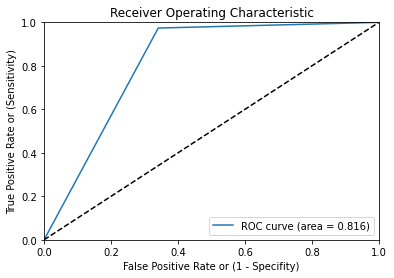

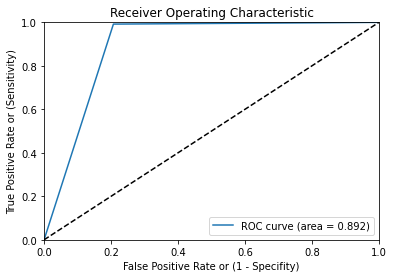

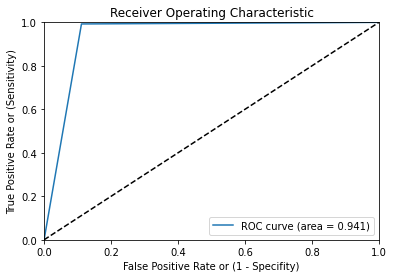

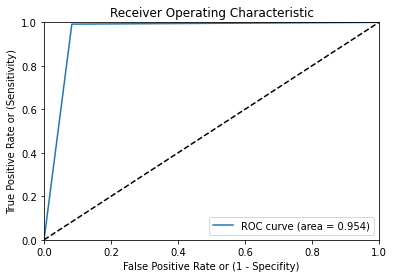

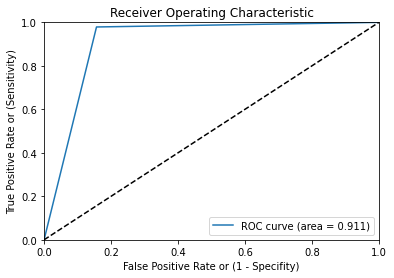

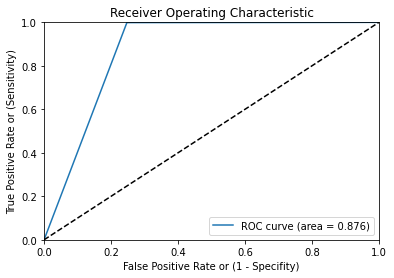

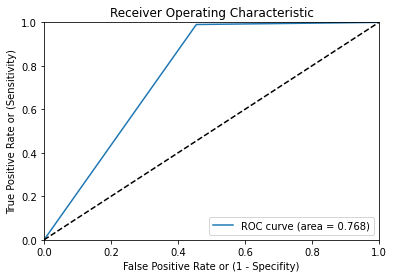

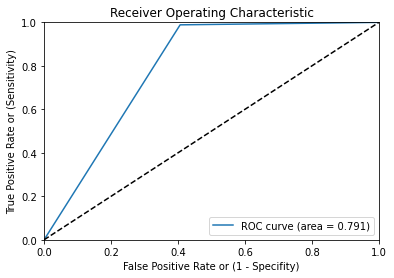

In [ ]:
plot_roc_auc(y_test,y_pred_lgb)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test_tfidf)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       319
           1       0.63      0.72      0.67       389
           2       0.70      0.80      0.74       394
           3       0.68      0.67      0.67       392
           4       0.76      0.81      0.78       385
           5       0.80      0.74      0.77       395
           6       0.76      0.90      0.83       390
           7       0.85      0.83      0.84       396
           8       0.91      0.91      0.91       398
           9       0.85      0.90      0.87       397
          10       0.88      0.94      0.91       399
          11       0.88      0.92      0.90       396
          12       0.69      0.54      0.61       393
          13       0.83      0.74      0.78       396
          14       0.84      0.89      0.86       394
          15       0.71      0.95      0.81       398
          16       0.68      0.90      0.77       364
          17       0.96    

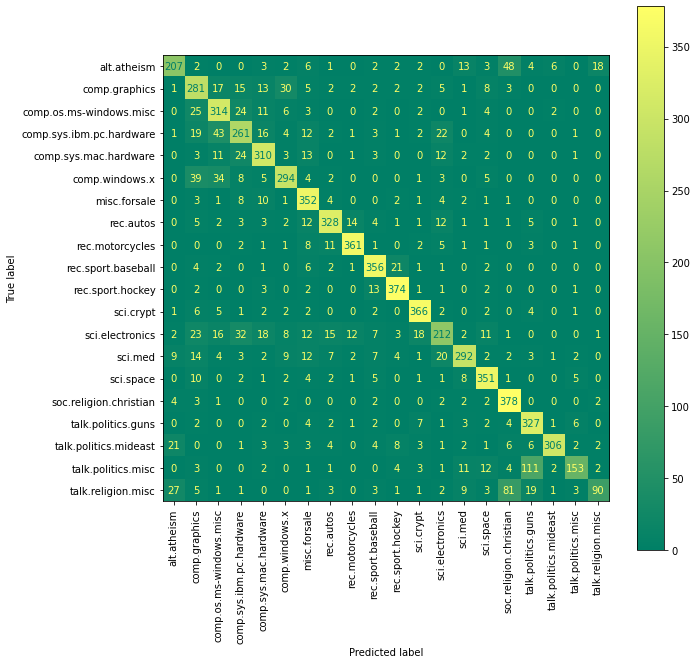

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = categories)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10 , 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

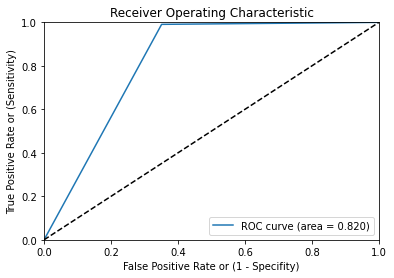

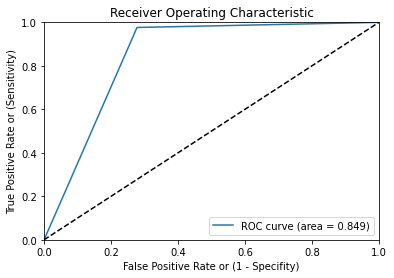

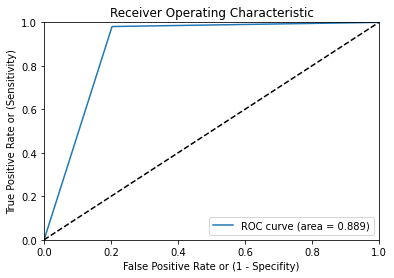

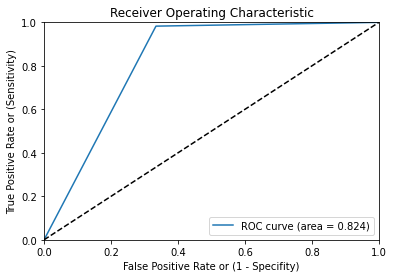

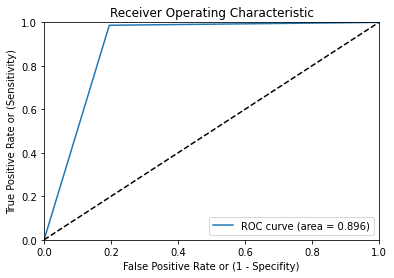

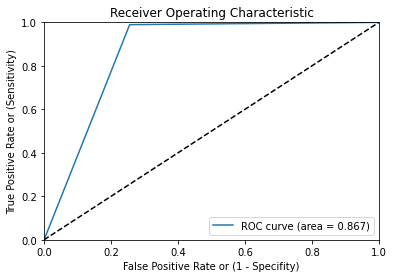

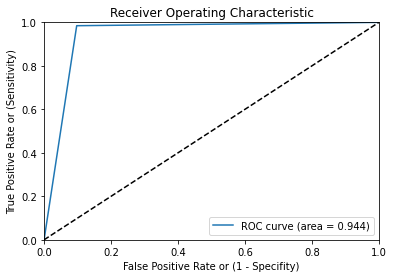

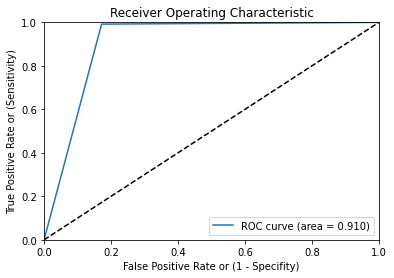

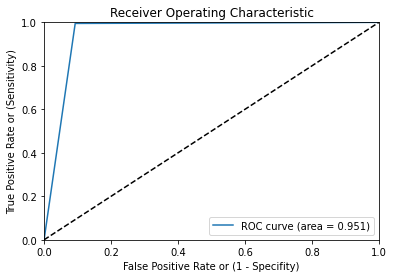

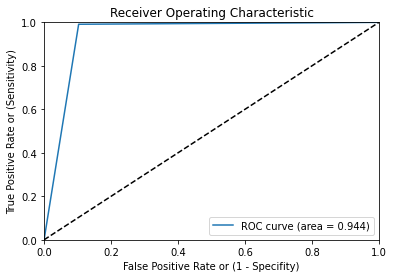

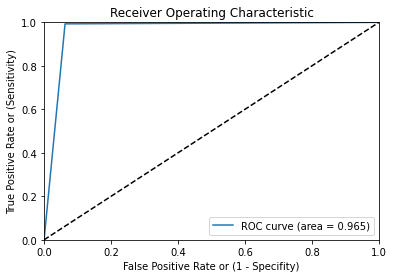

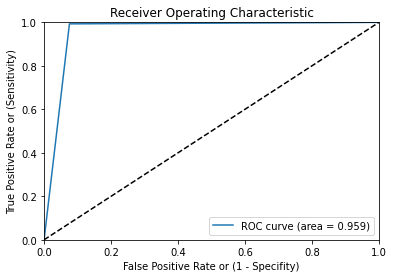

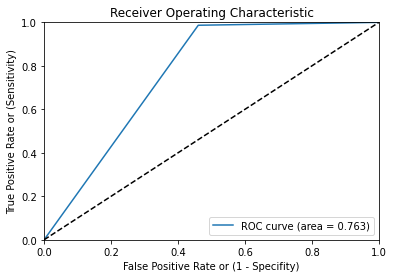

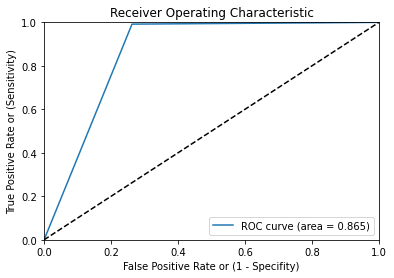

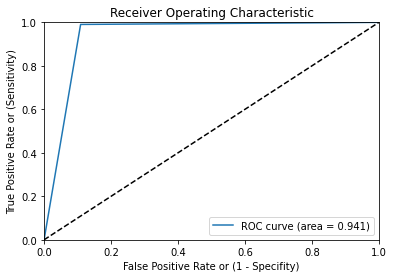

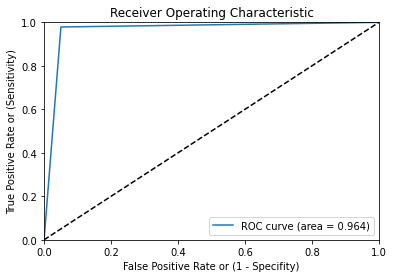

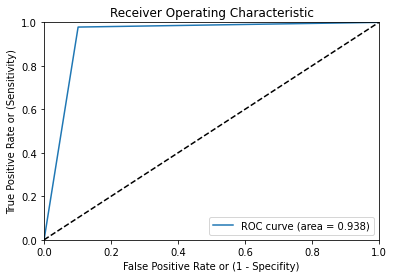

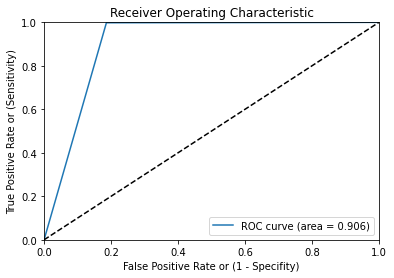

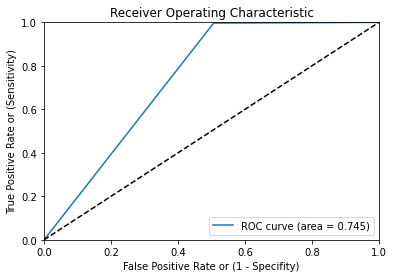

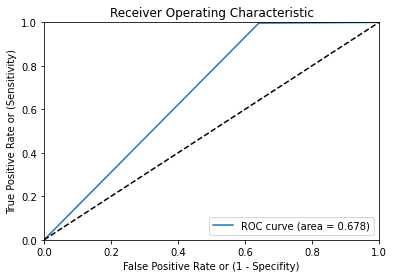

In [ ]:
plot_roc_auc(y_test,y_pred_rf)

## Max_features variation in TfidfVectorizer

In [ ]:
lst_accuracy = []
lst_max_features = []

for i in range(1000,25000,1500):
    lst_max_features.append(i)
    vectorizer_v = TfidfVectorizer(stop_words='english', use_idf=True,max_features=i)
    x_train_tfidf_v = vectorizer_v.fit_transform(X_train)
    x_test_tfidf_v = vectorizer_v.transform(X_test)
    model_svc_v = LinearSVC(C=1)
    model_svc_v.fit(x_train_tfidf_v,y_train)
    y_pred_svc_v = model_svc_v.predict(x_test_tfidf_v)
    lst_accuracy.append(accuracy_score(y_test,y_pred_svc_v))

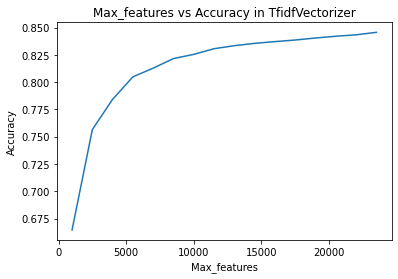

In [ ]:
plt.title("Max_features vs Accuracy in TfidfVectorizer") 
plt.xlabel("Max_features") 
plt.ylabel("Accuracy") 
plt.plot(lst_max_features,lst_accuracy) 
plt.show()

## PCA effect on accuracy


In [ ]:
lst_accuracy_pca = []
lst_dimensions = []

for i in range(5,100,10):
    pca = TruncatedSVD(i)
    x_train_pca = pca.fit_transform(x_train_tfidf)
    x_test_pca = pca.transform(x_test_tfidf)
    model_svc_pca = LinearSVC(C=1)
    model_svc_pca.fit(x_train_pca,y_train)
    y_pred_pca = model_svc_pca.predict(x_test_pca)
    lst_accuracy_pca.append(accuracy_score(y_test,y_pred_pca))
    lst_dimensions.append(i)

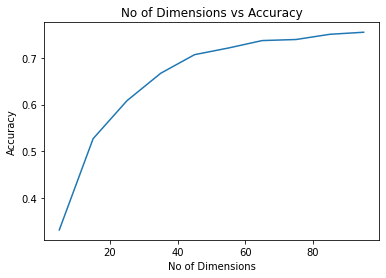

In [ ]:
plt.title("No of Dimensions vs Accuracy") 
plt.xlabel("No of Dimensions") 
plt.ylabel("Accuracy") 
plt.plot(lst_dimensions,lst_accuracy_pca) 
plt.show()

# K Means

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

In [140]:
multi_naive_bayes = MultinomialNB()

In [ ]:
# Selected 3 categories from the 20 newsgroups dataset

features = ['comp.graphics','sci.space','rec.sport.baseball']

print("Loading 20 newsgroups dataset for categories:")
print(features)

Loading 20 newsgroups dataset for categories:
['comp.graphics', 'sci.space', 'rec.sport.baseball']


In [ ]:
data_set = fetch_20newsgroups(subset='all', categories=features, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [ ]:
y_train_labels = data_set.target
unique_y_train_labels = len(np.unique(y_train_labels)) ## This should be 3 in this example
print(unique_y_train_labels)

3


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')  
lemat = WordNetLemmatizer()
for i in range(len(data_set.data)):
    words_arr = word_tokenize(data_set.data[i])
    lematised = ""
    for j in words_arr:
        lematised = lematised + " " + lemat.lemmatize(j)
    data_set.data[i] = lematised

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
vect = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
x = vect.fit_transform(data_set.data)

In [ ]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=1000)
pca.fit(x)
print(pca.explained_variance_ratio_[:10])

[0.00363589 0.00829962 0.00567363 0.0040036  0.00372821 0.00341184
 0.00330069 0.00313145 0.00301619 0.00281005 0.00273652 0.00268485
 0.00255034 0.00252155 0.00248053 0.00241    0.00238045 0.00235255
 0.00229968 0.00223124 0.00221932 0.00218723 0.00215535 0.00213507
 0.00207419 0.00204666 0.0019961  0.00196855 0.00196035 0.00192647
 0.00190922 0.00188364 0.00188458 0.00184172 0.00184101 0.0018279
 0.00180751 0.00179053 0.00177623 0.0017521  0.00174556 0.00172142
 0.00170731 0.00169866 0.0016785  0.00166722 0.00165838 0.00164388
 0.00164018 0.00163481 0.00162589 0.00160517 0.00159553 0.00158343
 0.00157329 0.00156955 0.00156219 0.0015472  0.00154444 0.00153148
 0.0015263  0.0015233  0.00151525 0.00149781 0.00149416 0.00148907
 0.00148383 0.00147646 0.00147551 0.00145881 0.0014506  0.00144414
 0.00143672 0.00142551 0.00141927 0.00141674 0.00141339 0.00139938
 0.00139796 0.00138938 0.00137692 0.00137129 0.001369   0.00135479
 0.00135221 0.00134796 0.00134319 0.0013385  0.00132868 0.00132

In [ ]:
print(pca.explained_variance_ratio_.sum())

0.7190252454320031


In [ ]:
kmeans = KMeans(n_clusters=unique_y_train_labels, init='k-means++', max_iter=100)
t0 = time()
kmeans.fit(x)
print("done in ", round((time() - t0),2),"s")

done in  1.63 s


In [ ]:
print("Homogeneity: " , metrics.homogeneity_score(y_train_labels, kmeans.labels_))
print("Completeness: " , metrics.completeness_score(y_train_labels, kmeans.labels_))
print("V-measure: " , metrics.v_measure_score(y_train_labels, kmeans.labels_))
print("Adjusted Rand-Index: ", metrics.adjusted_rand_score(y_train_labels, kmeans.labels_))
print("Silhouette Coefficient: ", metrics.silhouette_score(x, kmeans.labels_, sample_size=1000))

Homogeneity:  0.37709001145294774
Completeness:  0.43737917609431887
V-measure:  0.4050032120168229
Adjusted Rand-Index:  0.28554203203054357
Silhouette Coefficient:  0.010479546635859826


In [ ]:
centroids = kmeans.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
features = vect.get_feature_names()
for i in range(unique_y_train_labels):
    print("Cluster:" , i, end='')
    for ind in centroids[i, :10]:
        print(" " , features[ind], end='')
    print()

Cluster: 0  wa  space  just  like  think  ha  time  know  did  nasa
Cluster: 1  file  image  thanks  format  know  program  graphic  bit  gif  ftp
Cluster: 2  game  year  wa  team  player  hit  run  baseball  pitcher  think


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def frequencies_dict(cluster_index):
    if cluster_index > unique_y_train_labels - 1:
        return
    term_frequencies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {features[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [ ]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

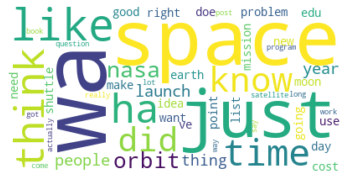

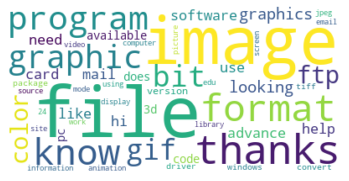

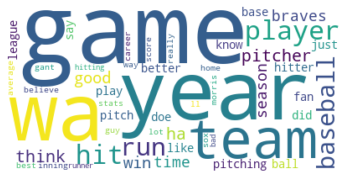

In [ ]:
for i in range(unique_y_train_labels):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

# Naive Bayes from scratch

In [128]:
def calc_prior(data_set, target):
    unique_classes = sorted(list(data_set[target].unique()))
    prior_lst = []
    for i in unique_classes:
        prior_lst.append(len(data_set[data_set[target]==i])/len(data_set))
    return prior_lst

In [129]:
def calc_likelihood(data_set, feat_name, feat_val, target, label):
    features = list(data_set.columns)
    data_set = data_set[data_set[target]==label]
    x_given_y = len(data_set[data_set[feat_name]==feat_val]) / len(data_set)
    return x_given_y

In [144]:
def multi_naive_baye(data_set, x_test, target):
    features = list(data_set.columns)[:-1]

    # prior
    prior_lst = calc_prior(data_set, target)

    y_pred = []
    for x in x_test:
        # likelihood
        labels = sorted(list(data_set[target].unique()))
        likelihood_lst = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood_lst[j] *= calc_likelihood(data_set, features[i], x[i], target, labels[j])

        # calculate posterior probability
        posterior = [1]*len(labels)
        for j in range(len(labels)):
            posterior[j] = likelihood_lst[j] * prior_lst[j]

        y_pred.append(np.argmax(posterior))
    y_pred = np.array(y_pred)
    return y_pred_svc_v

In [141]:
vector = TfidfVectorizer(stop_words='english', use_idf=True,max_features=3000)
x_train_tfidf_scratch = vector.fit_transform(X_train).toarray()
x_test_tfidf_scratch = vector.transform(X_test).toarray()
multi_naive_bayes.fit(x_train_tfidf_scratch,y_train)

MultinomialNB()

In [132]:
print(x_test_tfidf_scratch.shape)

(7532, 3000)


In [133]:
train = pd.DataFrame(x_train_tfidf_scratch[:100],columns = range(3000))
train['target']=y_train[:100]

In [142]:
y_pred_nb_scratch = multi_naive_bayes.predict(x_test_tfidf_scratch)

In [143]:
print(classification_report(y_test, y_pred_nb_scratch))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       319
           1       0.62      0.70      0.66       389
           2       0.67      0.74      0.70       394
           3       0.62      0.65      0.63       392
           4       0.76      0.70      0.73       385
           5       0.80      0.75      0.77       395
           6       0.75      0.82      0.78       390
           7       0.79      0.81      0.80       396
           8       0.83      0.90      0.86       398
           9       0.83      0.87      0.85       397
          10       0.89      0.93      0.91       399
          11       0.91      0.87      0.89       396
          12       0.67      0.59      0.63       393
          13       0.85      0.69      0.76       396
          14       0.80      0.85      0.83       394
          15       0.68      0.92      0.78       398
          16       0.65      0.85      0.74       364
          17       0.93    

# Custom input

In [147]:
x = input("Enter a paragraph : ")
l = []
l.append(x)
x_t = vectorizer.transform(l)
y_pred_svc = model_svc.predict(x_t)

Enter a paragraph : Our solar system consists of eight planets that revolve around the Sun, which is central to our solar system. These planets have broadly been classified into two categories that are inner planets and outer planets. Mercury, Venus, Earth, and Mars are called inner planets. The inner planets are closer to the Sun and they are smaller in size as compared to the outer planets. These are also referred to as the Terrestrial planets. And the other four Jupiter, Saturn, Uranus, and Neptune are termed as the outer planets. These four are massive in size and are often referred to as Giant planets.


In [ ]:
print(categories[y_pred_svc[0]])

sci.space
